In [103]:
#imports
import requests
import string
from bs4 import BeautifulSoup
import csv

#lists instantiation
jobs_gdansk = []
jobs_gdansk_no_stop = []
jobs_gdynia = []
jobs_gdynia_no_stop = []
jobs_sopot = []
jobs_sopot_no_stop = []
jobs_other = []
jobs_other_no_stop = []
jobs_remote = []
jobs_remote_no_stop = []

#custom stop words
STOP_WORDS = ['superoferta', 'kontrakt', 'b2b', 'umowa', 'pracę,', 'praca', 'stacjonarna', 'hybrydowa', 'zdalna', 
              'pełny', 'etat', 'zł', 'o', 'pracę', 'запрошуємо', 'працівників', 'з', 'україни', 'zlecenie', "część", 
              'etatu', 'od', 'zaraz']

#script for looping through pracuj.pl pages and appending each job offer into suitable list
page = requests.get("https://www.pracuj.pl/praca/trojmiasto;wp/it%20-%20rozw%C3%B3j%20oprogramowania;cc,5016?rd=30&pn=1")
for i in range(1,14):
    URL = "https://www.pracuj.pl/praca/trojmiasto;wp/it%20-%20rozw%C3%B3j%20oprogramowania;cc,5016?rd=30&pn=" + str(i)
    page = requests.get(URL)
    tags=BeautifulSoup(page.text, "html.parser")
    jobs=tags.find_all('div', {'class':'listing_c1dc6in8'})
    
    for job in jobs:
        job_text = str(job.get_text(separator=" ")).strip().lower().replace('[','').replace(']','').replace('(','').replace(')','')
        if "gdańsk" in job_text:
            if "praca zdalna" in job_text:
                jobs_remote.append(job_text)
            else:
                jobs_gdansk.append(job_text)
        elif "gdynia" in job_text:
            if "praca zdalna" in job_text:
                jobs_remote.append(job_text)
            else:
                jobs_gdynia.append(job_text)
        elif "sopot" in (job_text):
            if "praca zdalna" in job_text:
                jobs_remote.append(job_text)
            else:
                jobs_sopot.append(job_text)
        else:
            if "praca zdalna" in job_text:
                jobs_remote.append(job_text)
            else:
                jobs_other.append(job_text) 

#cleaning retrived data
for job in jobs_gdansk:
    job = job.split()
    job_no_stop = [w for w in job if w not in STOP_WORDS and w not in string.punctuation]
    jobs_gdansk_no_stop.append(job_no_stop)

for job in jobs_gdynia:
    job = job.split()
    job_no_stop = [w for w in job if w not in STOP_WORDS and w not in string.punctuation]
    jobs_gdynia_no_stop.append(job_no_stop)

for job in jobs_sopot:
    job = job.split()
    job_no_stop = [w for w in job if w not in STOP_WORDS and w not in string.punctuation]
    jobs_sopot_no_stop.append(job_no_stop)

for job in jobs_other:
    job = job.split()
    job_no_stop = [w for w in job if w not in STOP_WORDS and w not in string.punctuation]
    jobs_other_no_stop.append(job_no_stop)
    
for job in jobs_remote:
    job = job.split()
    job_no_stop = [w for w in job if w not in STOP_WORDS and w not in string.punctuation]
    jobs_remote_no_stop.append(job_no_stop)

#writing mined data into csv files
with open('jobs_gdansk.csv', 'w', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file, delimiter=",")
    for job in jobs_gdansk_no_stop:
        writer.writerow(job)
with open('jobs_gdynia.csv', 'w', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file, delimiter=",")
    for job in jobs_gdynia_no_stop:
        writer.writerow(job)
with open('jobs_sopot.csv', 'w', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file, delimiter=",")
    for job in jobs_sopot_no_stop:
        writer.writerow(job)
with open('jobs_remote.csv', 'w', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file, delimiter=",")
    for job in jobs_remote_no_stop:
        writer.writerow(job)
with open('jobs_other.csv', 'w', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file, delimiter=",")
    for job in jobs_other_no_stop:
        writer.writerow(job)

In [104]:
#counts number of job offers for given seniority in given location from .csv file
def count_seniority_number(location: str, seniority_names: list[str]):
  with open(f"jobs_{location}.csv") as csv_file:
    csv_data = csv.reader(csv_file, delimiter=',')
    number_of_seniorities = 0
    for data_row in csv_data:
      if any(keyword in seniority_names for keyword in data_row):
        number_of_seniorities += 1
    return number_of_seniorities

In [105]:
#maps of seniorities
seniorities = {
  'senior': ['senior', 'starszy'],
  'mid': ['mid', 'regular'],
  'junior': ['junior', 'młodszy'],
  'intern': ['intern', 'trainee', 'stażysta', 'staż', 'internship', 'praktyki', 'praktykant'],
}

locations = ['gdansk', 'gdynia', 'sopot', 'remote']
seniorities_names = list(seniorities.keys())


In [106]:
#retriving data from .csv files about number of job ofers for given seniority in given location
for location in locations:
  for seniority_name in seniorities_names:
    print(f'{seniority_name.capitalize()} in {location.capitalize()}: ' + str(count_seniority_number(location, seniorities[f'{seniority_name}'])))
  print('')

Senior in Gdansk: 53
Mid in Gdansk: 90
Junior in Gdansk: 18
Intern in Gdansk: 0

Senior in Gdynia: 6
Mid in Gdynia: 17
Junior in Gdynia: 1
Intern in Gdynia: 1

Senior in Sopot: 0
Mid in Sopot: 4
Junior in Sopot: 1
Intern in Sopot: 0

Senior in Remote: 111
Mid in Remote: 188
Junior in Remote: 21
Intern in Remote: 0



In [107]:
#write numbers of counted jobs per Location and Seniority into .csv file
with open('jobs_counted.csv', 'w', encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file, delimiter=",")
    writer.writerow([' '] + seniorities_names)
    for location in locations:
        seniority_numbers_counted = []
        for seniority_name in seniorities_names:
            seniority_numbers_counted.append(str(count_seniority_number(location, seniorities[f'{seniority_name}'])))
        writer.writerow([location.capitalize()] + seniority_numbers_counted)

In [108]:
#import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
#read data from jobs_counted.csv and display it as a table with usage of pandas
df = pd.read_csv('jobs_counted.csv')
jobs_counted_table = df.to_string(index=False)
print(jobs_counted_table)


        senior  mid  junior  intern
Gdansk      53   90      18       0
Gdynia       6   17       1       1
 Sopot       0    4       1       0
Remote     111  188      21       0


In [110]:
#show analyzed informations about data from jobs_counted.csv
df.describe().round(2)

,senior,mid,junior,intern
count,4.00,4.00,4.00,4.00
mean,42.50,74.75,10.25,0.25
std,51.45,84.46,10.75,0.50
min,0.00,4.00,1.00,0.00
25%,4.50,13.75,1.00,0.00
50%,29.50,53.50,9.50,0.00
75%,67.50,114.50,18.75,0.25
max,111.00,188.00,21.00,1.00


<AxesSubplot: title={'center': 'Job positions in selected cities with seniority placement'}, xlabel='City', ylabel='Number of job positions'>

<Figure size 640x480 with 0 Axes>

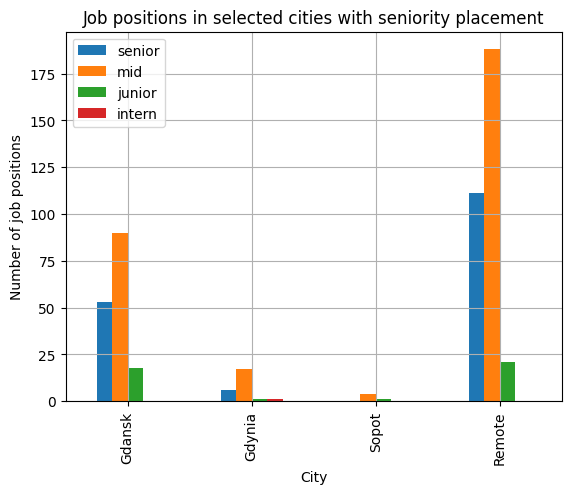

In [111]:
#create a bar chart from data in jobs_counted.csv
plt.figure()

df.plot(kind="bar", title='Job positions in selected cities with seniority placement', grid=True, x=0, xlabel='City', ylabel='Number of job positions')